<a href="https://colab.research.google.com/github/Blaise-g/DL_framework_optic_nerve_stimulation/blob/main/CRNN_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyret

In [ ]:
!pip install sigfig

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Sem_proj/retina-crnn_model/core/'

/content/drive/MyDrive/Sem_proj_optic/retina-crnn_model/core


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
!python test_models.py --stim movie2 --model crnn_lstm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
ccs = pd.read_pickle('/content/drive/MyDrive/Sem_proj/retina-crnn_model/core/test')

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
import seaborn as sns
ccs = pd.DataFrame(ccs, columns=['Correlation coefficient'])

In [ ]:
ccs['Cell N'] = range(1,81)
ccs.head()

Correlation coefficient  Cell N
0                    0.877       1
1                    0.536       2
2                    0.650       3
3                    0.869       4
4                    0.858       5

In [ ]:
#can maybe do a countplot in different ranges of the cc like 0.7 - 0.8 etc
sns.set_theme()

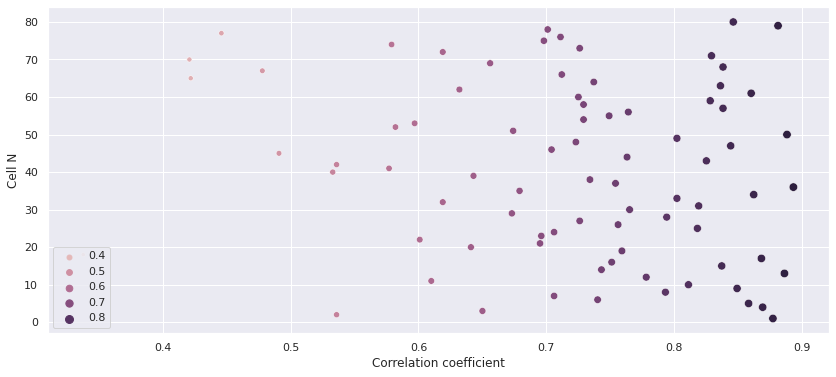

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=ccs, x="Correlation coefficient", y="Cell N", hue="Correlation coefficient", size="Correlation coefficient")
plt.legend(loc='lower left')

In [ ]:
gaus_4 = np.ones(80)

In [ ]:
indexes = [10,12,14,16,17,19,24,27,28,36,38,43,44,47,48,50,53,61,67,69,72,74,75,77,78,]

In [ ]:
gaus_4

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.])

In [ ]:
for i in indexes:
  gaus_4[i-1] = 0

In [ ]:
ccs['Gaussian_filter_4px'] = gaus_4

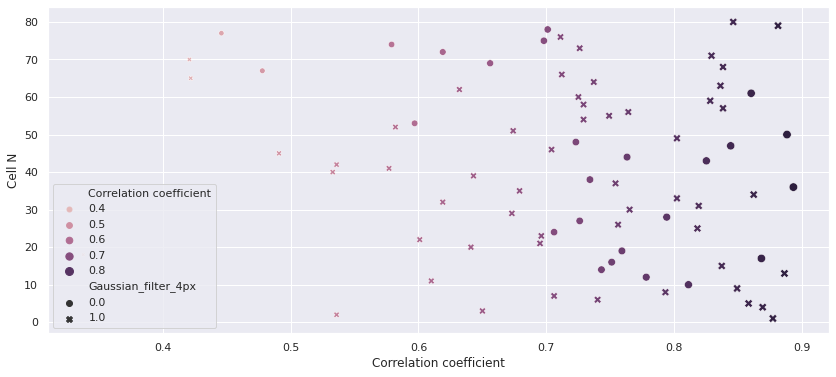

In [ ]:

plt.figure(figsize=(14, 6))
sns.scatterplot(data=ccs, x="Correlation coefficient", y="Cell N", hue="Correlation coefficient", size="Correlation coefficient", style="Gaussian_filter_4px")
plt.legend(loc='lower left')

In [ ]:
#correct the quality of the RFs that we are keeping visually, if inside circle there is indeed red looking also at original before ellipse drawing


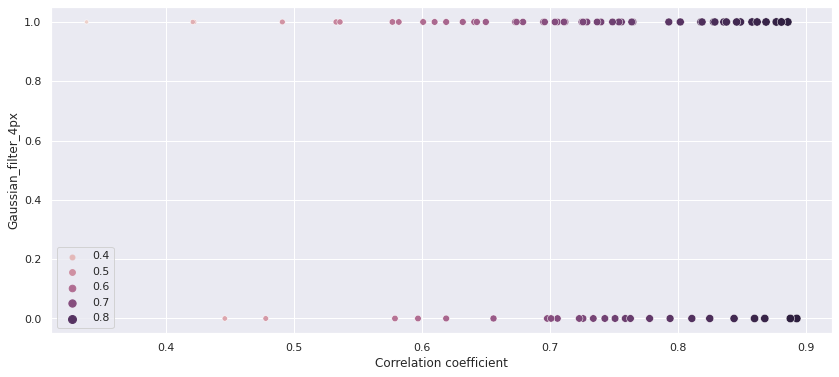

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=ccs, x="Correlation coefficient", y="Gaussian_filter_4px", hue="Correlation coefficient", size="Correlation coefficient")
plt.legend(loc='lower left')

In [ ]:
#multiply each spatial filter par firing rate and sum them over
import numpy as np
import h5py
import matplotlib.pyplot as plt


In [ ]:
f = h5py.File('/content/drive/MyDrive/Sem_proj/retina-crnn_model/core/results/crnn_lstm/response_test/result.hdf5','r')
f.keys()
fir_rate_data = f.get('r_data')

In [ ]:
fir_rate_data = f.get('r_data')

In [ ]:
fir_rate_pre = f.get('r_pre')
#firi_ra_pre = np.array(fir_rate_pre)
fir_rate_pre.shape

(780, 80)

In [ ]:
test_file = h5py.File('/content/drive/MyDrive/Sem_proj/retina-crnn_model/core/data/test_mov3.hdf5', 'r')
test_file.keys()

<KeysViewHDF5 ['mov3_tst_r', 'mov3_tst_x', 'mov3_tst_y']>

In [ ]:
tr = h5py.File('/content/drive/MyDrive/Sem_proj/retina-crnn_model/core/data/train_mov3.hdf5', 'r')
tr.keys()

<KeysViewHDF5 ['mov3_trn_r', 'mov3_trn_x', 'mov3_trn_y']>

In [ ]:
frames_tr = tr.get('mov3_trn_x') #frames have been split exac in two

In [ ]:
frames = test_file.get('mov3_tst_x')

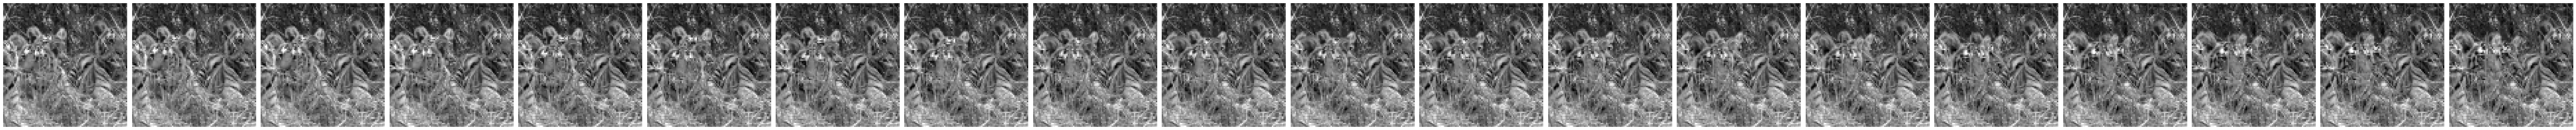

In [ ]:
f, axarr = plt.subplots(1,20, sharey=True, figsize=(80,10))
for i in range(700,720):
  axarr[i-700].imshow(frames_tr[:,:,i], cmap='gray', origin='lower')
  axarr[i-700].axis('off')
plt.tight_layout()
plt.show()

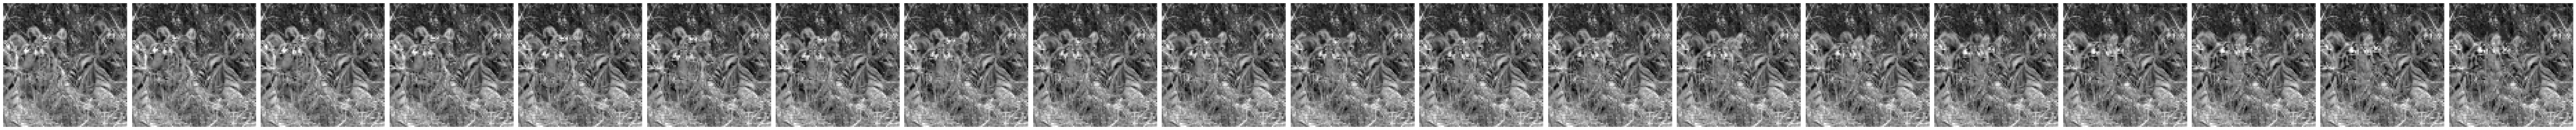

In [ ]:
f, axarr = plt.subplots(1,20, sharey=True, figsize=(80,10))
for i in range(700,720):
  axarr[i-700].imshow(frames[:,:,i], cmap='gray', origin='lower')
  axarr[i-700].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
y_data = test_file.get('mov3_tst_y')
#y_data = np.array(y_data)
y_data.shape

(33, 80, 800)

In [ ]:
y_tr_data = tr.get('mov3_trn_y')

In [ ]:
y_tr_data.shape

(33, 80, 800)

In [ ]:
import scipy.io as sio

In [ ]:
s1 = sio.loadmat('/content/drive/MyDrive/Sem_proj/data_paper/spikes/Movie2Exp1.mat')

In [ ]:
s1.keys() #30 trials and 38 neurons

dict_keys(['__header__', '__version__', '__globals__', 'n_trials', 'n_neurons', 'Spikes'])

In [ ]:
sp1 = s1.get('Spikes')

In [ ]:
sp1.shape

(38, 30)

In [ ]:
s2 = sio.loadmat('/content/drive/MyDrive/Sem_proj/data_paper/spikes/Movie2Exp2.mat')
sp2 = s2.get('Spikes')

In [ ]:
sp2.shape

(49, 30)

### try to identify retino ganglian cells

In [ ]:
sp_test = np.array(y_data)

In [ ]:
sp_test.shape

(33, 80, 800)

In [ ]:
sp_train = np.array(y_tr_data)
sp_train.shape

(33, 80, 800)

In [ ]:
#let's start to try to compare first neurons of sp1, they are both spike counts
sp1 = sp1.T
sp1.shape

(38, 30)

In [ ]:
sp1.shape

(38, 30)

In [ ]:
sp1[0,9]

array([[  736],
       [  805],
       [  817],
       [ 3315],
       [ 7462],
       [ 8238],
       [14946],
       [14954],
       [14963],
       [14976],
       [15660],
       [15678],
       [15702],
       [15734],
       [17221]], dtype=int32)

In [ ]:
sp1 = np.array(sp1)
np.where(np.squeeze(sp1[0,0])>0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),)

In [ ]:
np.where(np.squeeze(sp1[0,1])>0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),)

In [ ]:
np.where(sp_test[0,0,:]>1)

(array([206]),)

In [ ]:
np.where(sp_train[0,0,:]>1)

(array([499]),)

### recpetive fields analysis try to get 80 from 90 cells

In [ ]:
r_data = test_file.get('mov3_tst_r')
r_data.shape

(80, 800)

In [ ]:
fr_orig = np.array(r_data)
fr_orig = fr_orig[:, 20:]

In [ ]:
fr_orig.shape

(80, 780)

In [ ]:
np.array_equal(fir_rate_data,fr_orig.T) #have to remove first 20 datapoints for the two to be equals

True

In [ ]:
frames = test_file.get('mov3_tst_x')
frames.shape

(90, 90, 800)

In [ ]:
frames_adj = frames[:,:,20:]

In [ ]:
frames_adj.shape

(90, 90, 780)

In [ ]:
fir_rate_data.shape

(780, 80)

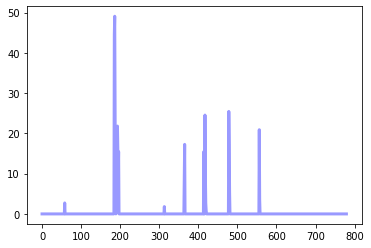

In [ ]:
 plt.plot(fir_rate_data[:,0].T, 'b', linewidth=3, alpha=0.4, label='data') #equals to use fr_orig

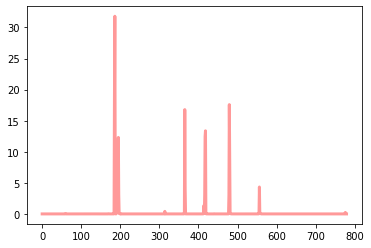

In [ ]:
 plt.plot(fir_rate_pre[:,0].T, 'r', linewidth=3, alpha=0.4, label='data')

In [ ]:
fir_rate_pre = np.array(fir_rate_pre)

In [ ]:
fir_rate_pre.shape

(780, 80)

In [ ]:
sp_train_pre = np.empty([780,80])
sp_train_data = np.empty([780,80])

In [ ]:
#no need to set random seed in these circumstances
fir_rate_pre[fir_rate_pre<0] = 0 #no need
fir_rate_data[fir_rate_data<0] = 0 #no need
for i in range(0,80):
  sp_train_pre[:,i] = np.array(np.random.poisson(fir_rate_pre[:,i])>0) #sample individual spike train with poisson process
  sp_train_data[:,i] = np.array(np.random.poisson(fir_rate_data[:,i])>0) #check if poisson process has to be done different times for each cell or separated

In [ ]:
sp_train_pre #predicted spike train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
sp_train_data[:,0].shape

(780,)

In [ ]:
spike_train_predicted = np.multiply(sp_train_pre,1) #just a check but makes sense that directly returning 1 and 0
np.array_equal(spike_train_predicted, sp_train_pre)

In [ ]:
spi_d=np.where(sp_train_data[:,0]>0)

In [ ]:
spi_d = np.empty([])

(array([ 58, 185, 186, 187, 188, 190, 191, 192, 193, 194, 195, 196, 364,
        365, 414, 417, 418, 419, 420, 478, 479, 480, 556, 557]),)

In [ ]:
for i in range(0,80):
  spi_d[:,i] = np.where(sp_train_data[:,i]>0)
  spi_pre[:,i] = np.where(sp_train_pre[:,i]>0)

TypeError: ignored

In [ ]:
spa = np.linspace(0,1,80)
spa

array([0.        , 0.01265823, 0.02531646, 0.03797468, 0.05063291,
       0.06329114, 0.07594937, 0.08860759, 0.10126582, 0.11392405,
       0.12658228, 0.13924051, 0.15189873, 0.16455696, 0.17721519,
       0.18987342, 0.20253165, 0.21518987, 0.2278481 , 0.24050633,
       0.25316456, 0.26582278, 0.27848101, 0.29113924, 0.30379747,
       0.3164557 , 0.32911392, 0.34177215, 0.35443038, 0.36708861,
       0.37974684, 0.39240506, 0.40506329, 0.41772152, 0.43037975,
       0.44303797, 0.4556962 , 0.46835443, 0.48101266, 0.49367089,
       0.50632911, 0.51898734, 0.53164557, 0.5443038 , 0.55696203,
       0.56962025, 0.58227848, 0.59493671, 0.60759494, 0.62025316,
       0.63291139, 0.64556962, 0.65822785, 0.67088608, 0.6835443 ,
       0.69620253, 0.70886076, 0.72151899, 0.73417722, 0.74683544,
       0.75949367, 0.7721519 , 0.78481013, 0.79746835, 0.81012658,
       0.82278481, 0.83544304, 0.84810127, 0.86075949, 0.87341772,
       0.88607595, 0.89873418, 0.91139241, 0.92405063, 0.93670

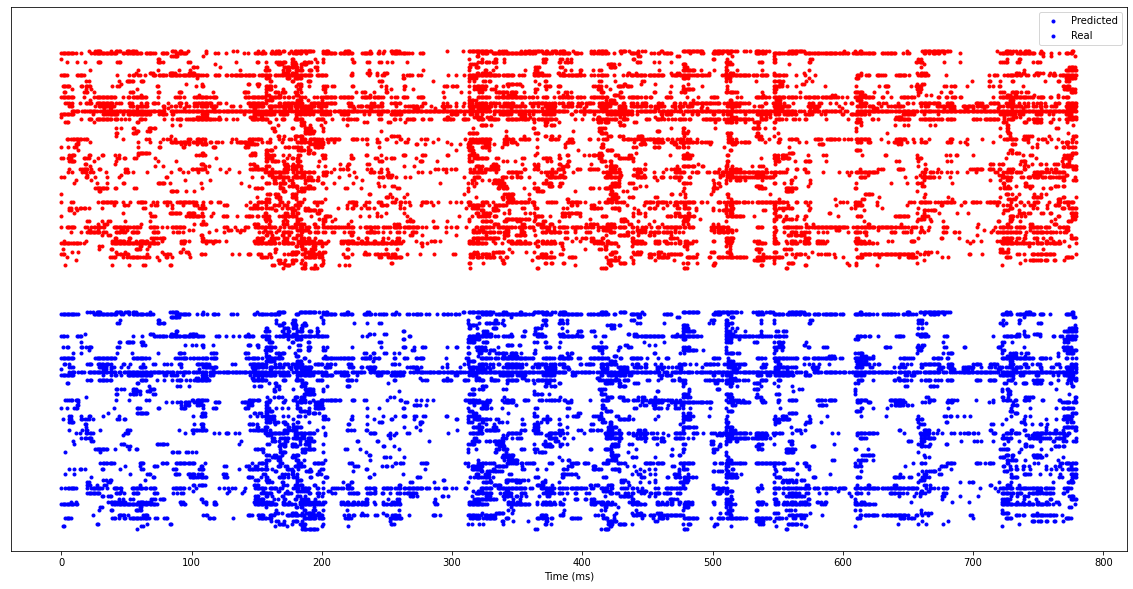

In [ ]:
plt.figure(figsize=(20,10))
for i in range(80):
  plt.plot(np.where(sp_train_data[:,i]>0), (1+spa[i]) * np.ones_like(np.where(sp_train_data[:,i]>0)), '.', color='b')
  plt.plot(np.where(sp_train_pre[:,i]>0), (2.2+spa[i]) * np.ones_like(np.where(sp_train_pre[:,i]>0)), '.', color='r')

#plt.xlim([-0.5, 20])
plt.ylim([0.9,3.4])                                # ... display times (0, 20) s
plt.xlabel('Time (ms)')
plt.legend({'Real', 'Predicted'})                          # ... label the x-axis
plt.yticks([])                                  # ... remove y-axis ticks
plt.show()

Tirando fuori entrambi individual spike trains dai firing rate -> ora prova usando spike train originari

In [ ]:
#do all the needed anlysis with pyspike isi, distance etc

In [ ]:
y_data.shape

(33, 780, 80)

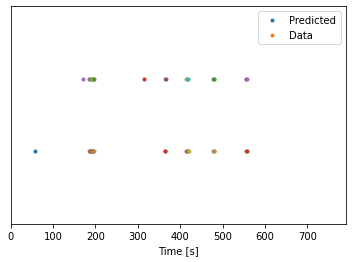

In [ ]:
plt.plot(spi_d, np.ones_like(spi_d), '.')        # Plot the low-light condition spikes
plt.plot(spi_pre, 2 * np.ones_like(spi_pre), '.')  # ... and the high-light condition spikes 
plt.xlim([0, 790])              # Display times 10 to 11 s on the x-axis
plt.ylim([0, 3])                # ... and set the y-axis limits
plt.xlabel('Time [s]')              # ... label the x-axis
plt.legend({'Data', 'Predicted'})     # ... show a legend
plt.yticks([])                  # ... remove y-axis ticks
plt.show()

In [ ]:
#binned spike trains (bin of 33 ms if neuron gonna fire or not)

In [ ]:
y_data = y_data[:,:,20:]

In [ ]:
y_data = np.transpose(y_data, (0,2,1))

In [ ]:
y_data

array([[[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 2],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_data

array([[[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 2],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
print(sp1[0,0])

In [ ]:
sp1[1,0]

array([[  834],
       [ 1690],
       [ 1694],
       [ 1698],
       [ 2088],
       [ 2093],
       [ 2238],
       [ 2243],
       [ 2248],
       [ 2254],
       [ 5091],
       [ 7580],
       [ 7586],
       [ 8286],
       [ 8291],
       [13953],
       [13958],
       [13964],
       [14993],
       [17289]], dtype=int32)

In [ ]:
#trying to compare spike train data and correlate of which cells we are talking about
#prob are just the first 80 cells?

In [ ]:
gg = sio.loadmat('/content/drive/MyDrive/Sem_proj/retina-crnn_model/core/data/cell_simpleNL_off_2GC_v3.mat')

In [ ]:
gg.keys()

dict_keys(['__header__', '__version__', '__globals__', 'CB', 'fr'])

In [ ]:
CB = gg.get('CB')

In [ ]:
CB.shape

(8, 8, 300000)

In [ ]:
fr_git = gg.get('fr')

In [ ]:
fr_git.shape

(300000, 2)

In [ ]:
fr_git[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
fr_git[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_data.shape

(33, 780, 80)

In [ ]:
print(y_data[0,:,:])

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
s1

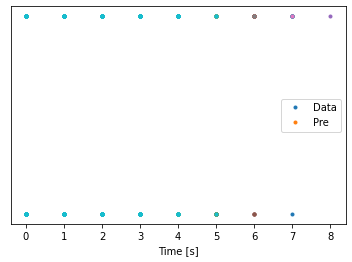

In [ ]:
plt.plot(sp_train_data, np.ones_like(sp_train_data), '.')  # Plot the low-light condition spikes
plt.plot(sp_train_pre, 2 * np.ones_like(sp_train_pre), '.')  # ... and the high-light condition spikes 
#plt.xlim([0, 800])              # Display times 0 to 5 s on the x-axis
#ylim([0, 3])              # ... and set the y-axis limits
plt.xlabel('Time [s]')            # ... label the x-axis
plt.legend({'Data', 'Pre'})   # ... show a legend
plt.yticks([])                # ... remove y-axis ticks
plt.show()

In [ ]:
#try cross correlation and global syncrony with pyspike package, also peristimulus histogram

In [ ]:
!pip install pyspike

In [ ]:
import pyspike as spk

In [ ]:
sp_data_0 = spk.SpikeTrain()

In [ ]:
def jspth(spikes1, spikes2):
    '''Joint Peristimulus Time Histogram
    
    Parameters
    ----------
    spikes1, spikes2: ndarray, shape (n_time, n_trials)
    
    Returns
    -------
    joint_histogram : ndarray, shape (n_time, n_time)
    
    '''
    n_time = spikes1.shape[0]
    joint_histogram = np.zeros((n_time, n_time))
    for single_trial_spikes1, single_trial_spikes2 in zip(spikes1.T, spikes2.T):
        joint_histogram += (single_trial_spikes1[:, np.newaxis]
                            * single_trial_spikes2[:, np.newaxis].T)
    
    return joint_histogram

In [ ]:
j_hist = jspth(fir_rate_data[:,0], fir_rate_pre[:,0])

IndexError: ignored

try to plot the orginal receptive fields

In [ ]:
ff = sio.loadmat('/content/drive/MyDrive/Sem_proj/data_paper/RFs/Movie2Exp1.mat')

In [ ]:
ff.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ReceptiveFields'])

In [ ]:
Rf_data1 = ff.get('ReceptiveFields')

In [ ]:
Rf_data1 = np.array(Rf_data1)

In [ ]:
Rf_data1.shape

(1, 38)

In [ ]:
f2 = sio.loadmat('/content/drive/MyDrive/Sem_proj/data_paper/RFs/Movie2Exp2.mat')

In [ ]:
Rf_data2 = f2.get('ReceptiveFields')

In [ ]:
Rf_data2 = np.array(Rf_data2)

In [ ]:
Rf_data2.shape

(1, 49)

In [ ]:
Rf_data2 = np.squeeze(Rf_data2)

In [ ]:
Rf_data1 = np.squeeze(Rf_data1)

In [ ]:
Rf_data2[0].shape

(2, 1000)

In [ ]:
for i in range(49):
  print(np.max(Rf_data2[i][0,:]))
  print(np.max(Rf_data2[i][1,:]))


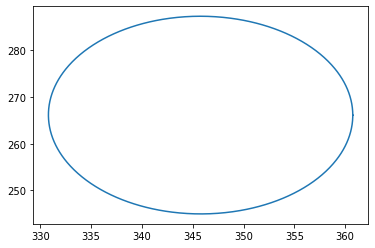

In [ ]:
plt.plot(Rf_data2[0][0,:],Rf_data2[0][1,:])

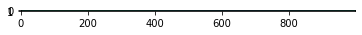

In [ ]:
plt.imshow(Rf_data2[0])

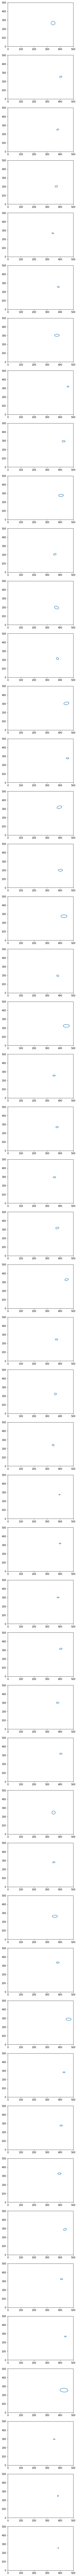

In [ ]:
f, axarr = plt.subplots(49,1, sharey=True, figsize=(5,200))
for i in range(49):
  axarr[i].plot(Rf_data2[i][0,:],Rf_data2[i][1,:])
  axarr[i].set_xlim([0,500])
  axarr[i].set_ylim([0,500])

In [ ]:
plt.plot(fir_rate_pre[:,0], 'b', linewidth=3, alpha=0.4, label='data')

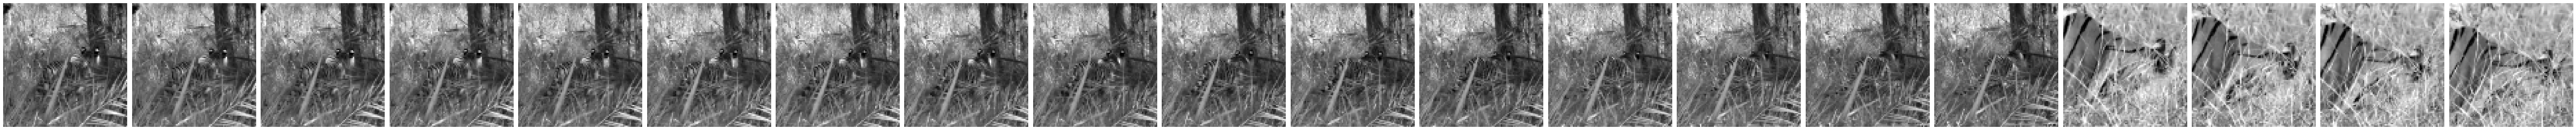

In [ ]:
#test_1fram = fram_X[:,:,0,:]
#plt.imshow(test_1fram[:,:,0], cmap='gray', origin='lower')
f, axarr = plt.subplots(1,20, sharey=True, figsize=(80,10))
for i in range(0,20):
  test_1fram = fram_X[:,:,i,:]
  axarr[i].imshow(test_1fram[:,:,0], cmap='gray', origin='lower')
  axarr[i].axis('off')
plt.tight_layout()
plt.show()

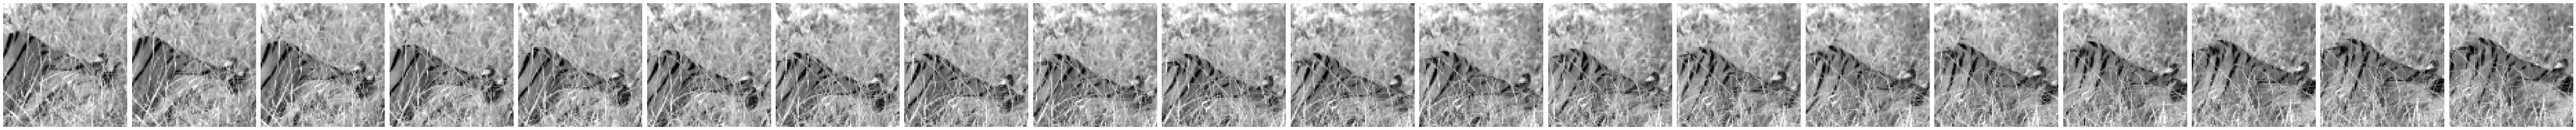

In [ ]:
f, axarr = plt.subplots(1,20, sharey=True, figsize=(80,10))
for i in range(0,20):
  axarr[i].imshow(frames_adj[:,:,i], cmap='gray', origin='lower')
  axarr[i].axis('off')
plt.tight_layout()
plt.show()

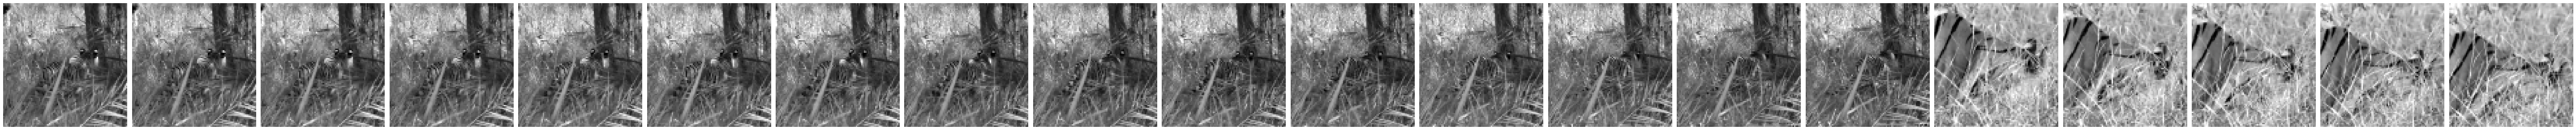

In [ ]:
f, axarr = plt.subplots(1,20, sharey=True, figsize=(80,10))
for i in range(0,20):
  test_1fram = fram_X[:,:,i,:]
  axarr[i].imshow(test_1fram[:,:,1], cmap='gray', origin='lower')
  axarr[i].axis('off')
plt.tight_layout()
plt.show()

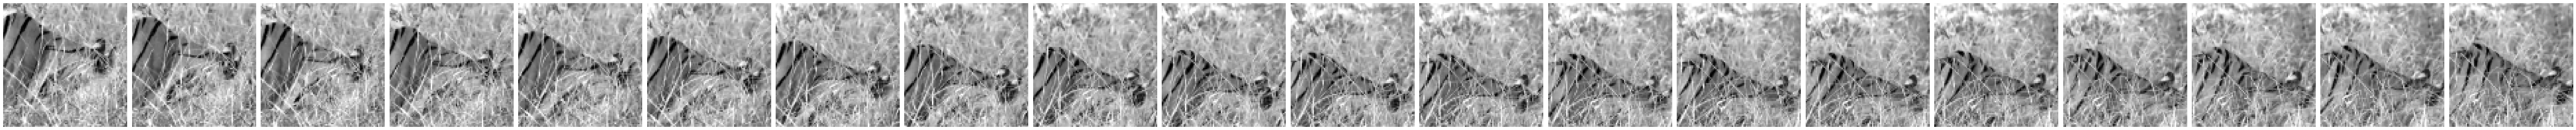

In [ ]:
f, axarr = plt.subplots(1,20, sharey=True, figsize=(80,10))
for i in range(0,20):
  test_1fram = fram_X[:,:,i,:]
  axarr[i].imshow(test_1fram[:,:,16], cmap='gray', origin='lower')
  axarr[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import pickle

In [ ]:
with open("/content/drive/MyDrive/Sem_proj/retina-crnn_model/core/val.pkl", "rb") as fp:
   val_data = pickle.load(fp)

In [ ]:
val_data

In [ ]:
val_data[1].shape

(780, 80)

In [ ]:
val_data[2].shape

(33, 80, 780)

In [ ]:
fram_X = val_data[0]

In [ ]:
fram_X.shape

(90, 90, 20, 780)

In [ ]:
test_1fram = fram_X[:,:,0,:]

In [ ]:
Rfs = np.load('/content/drive/MyDrive/Sem_proj/retina-crnn_model/core/results/crnn_lstm/denseSta.npy')

In [ ]:
print(Rfs.shape)

(80, 20, 90, 90)


In [ ]:
def matrix_rotate(A): #rotate matrix to be plotted
    h = A.shape[0]
    w = A.shape[1]
    Ar = np.zeros_like(A)
    for i in range(h):
        for j in range(w):
            Ar[i,j] = A[h-1-i,w-1-j]
    return Ar

In [ ]:
def visualize_sta(sta, fig_size=(8, 10), display=True, normalize=True):

    '''
    if len(sta) == 3:
        num_units = 1
    else:
    '''
    nt = 20
    print('sta_shape: ' + str(sta.shape))
    num_units = sta.shape[0]

    fig_size = (30,40)
    # plot space and time profiles together
    fig = plt.gcf()
    fig.set_size_inches(fig_size)
    num_cols = int(np.sqrt(num_units))
    num_rows = int(np.ceil(num_units/num_cols))
    print(str(num_rows) + ' rows ' + str(num_cols) + ' cols')
    cl_max = 0
    for x in range(num_cols):
        for y in range(num_rows):
            plt_idx = y * num_cols + x + 1
            if plt_idx > num_units:
                break
            if nt > 1:
                spatial,temporal = pyret.filtertools.decompose(sta[plt_idx-1])
            else:
                spatial = sta[plt_idx-1][0]
            cl_max = max(cl_max, np.max(abs(spatial)))
    colorlimit = [-cl_max, cl_max]
    spa = []
    for x in range(num_cols):
        for y in range(num_rows):
            plt_idx = y * num_cols + x + 1
            if plt_idx > num_units:
                break
            if nt > 1:
                spatial,temporal = pyret.filtertools.decompose(sta[plt_idx-1])

            else:
                spatial = sta[plt_idx-1][0]
                temporal = np.array([])

            if abs(np.min(spatial)) > abs(np.max(spatial)):
                spatial = -1 * spatial
                temporal = -1 * temporal

            ax = plt.subplot2grid((num_rows*4, num_cols), (4*y, x), rowspan=3)
            ax.imshow(matrix_rotate(spatial), interpolation='nearest', cmap='seismic', clim=colorlimit)
            spa.append(matrix_rotate(spatial))
            plt.grid('off')
            plt.xticks([])
            plt.yticks([])
            plt.axis('on')
    #spat = matrix_rotate(spatial)
    return spa

sta_shape: (80, 20, 90, 90)
10 rows 8 cols


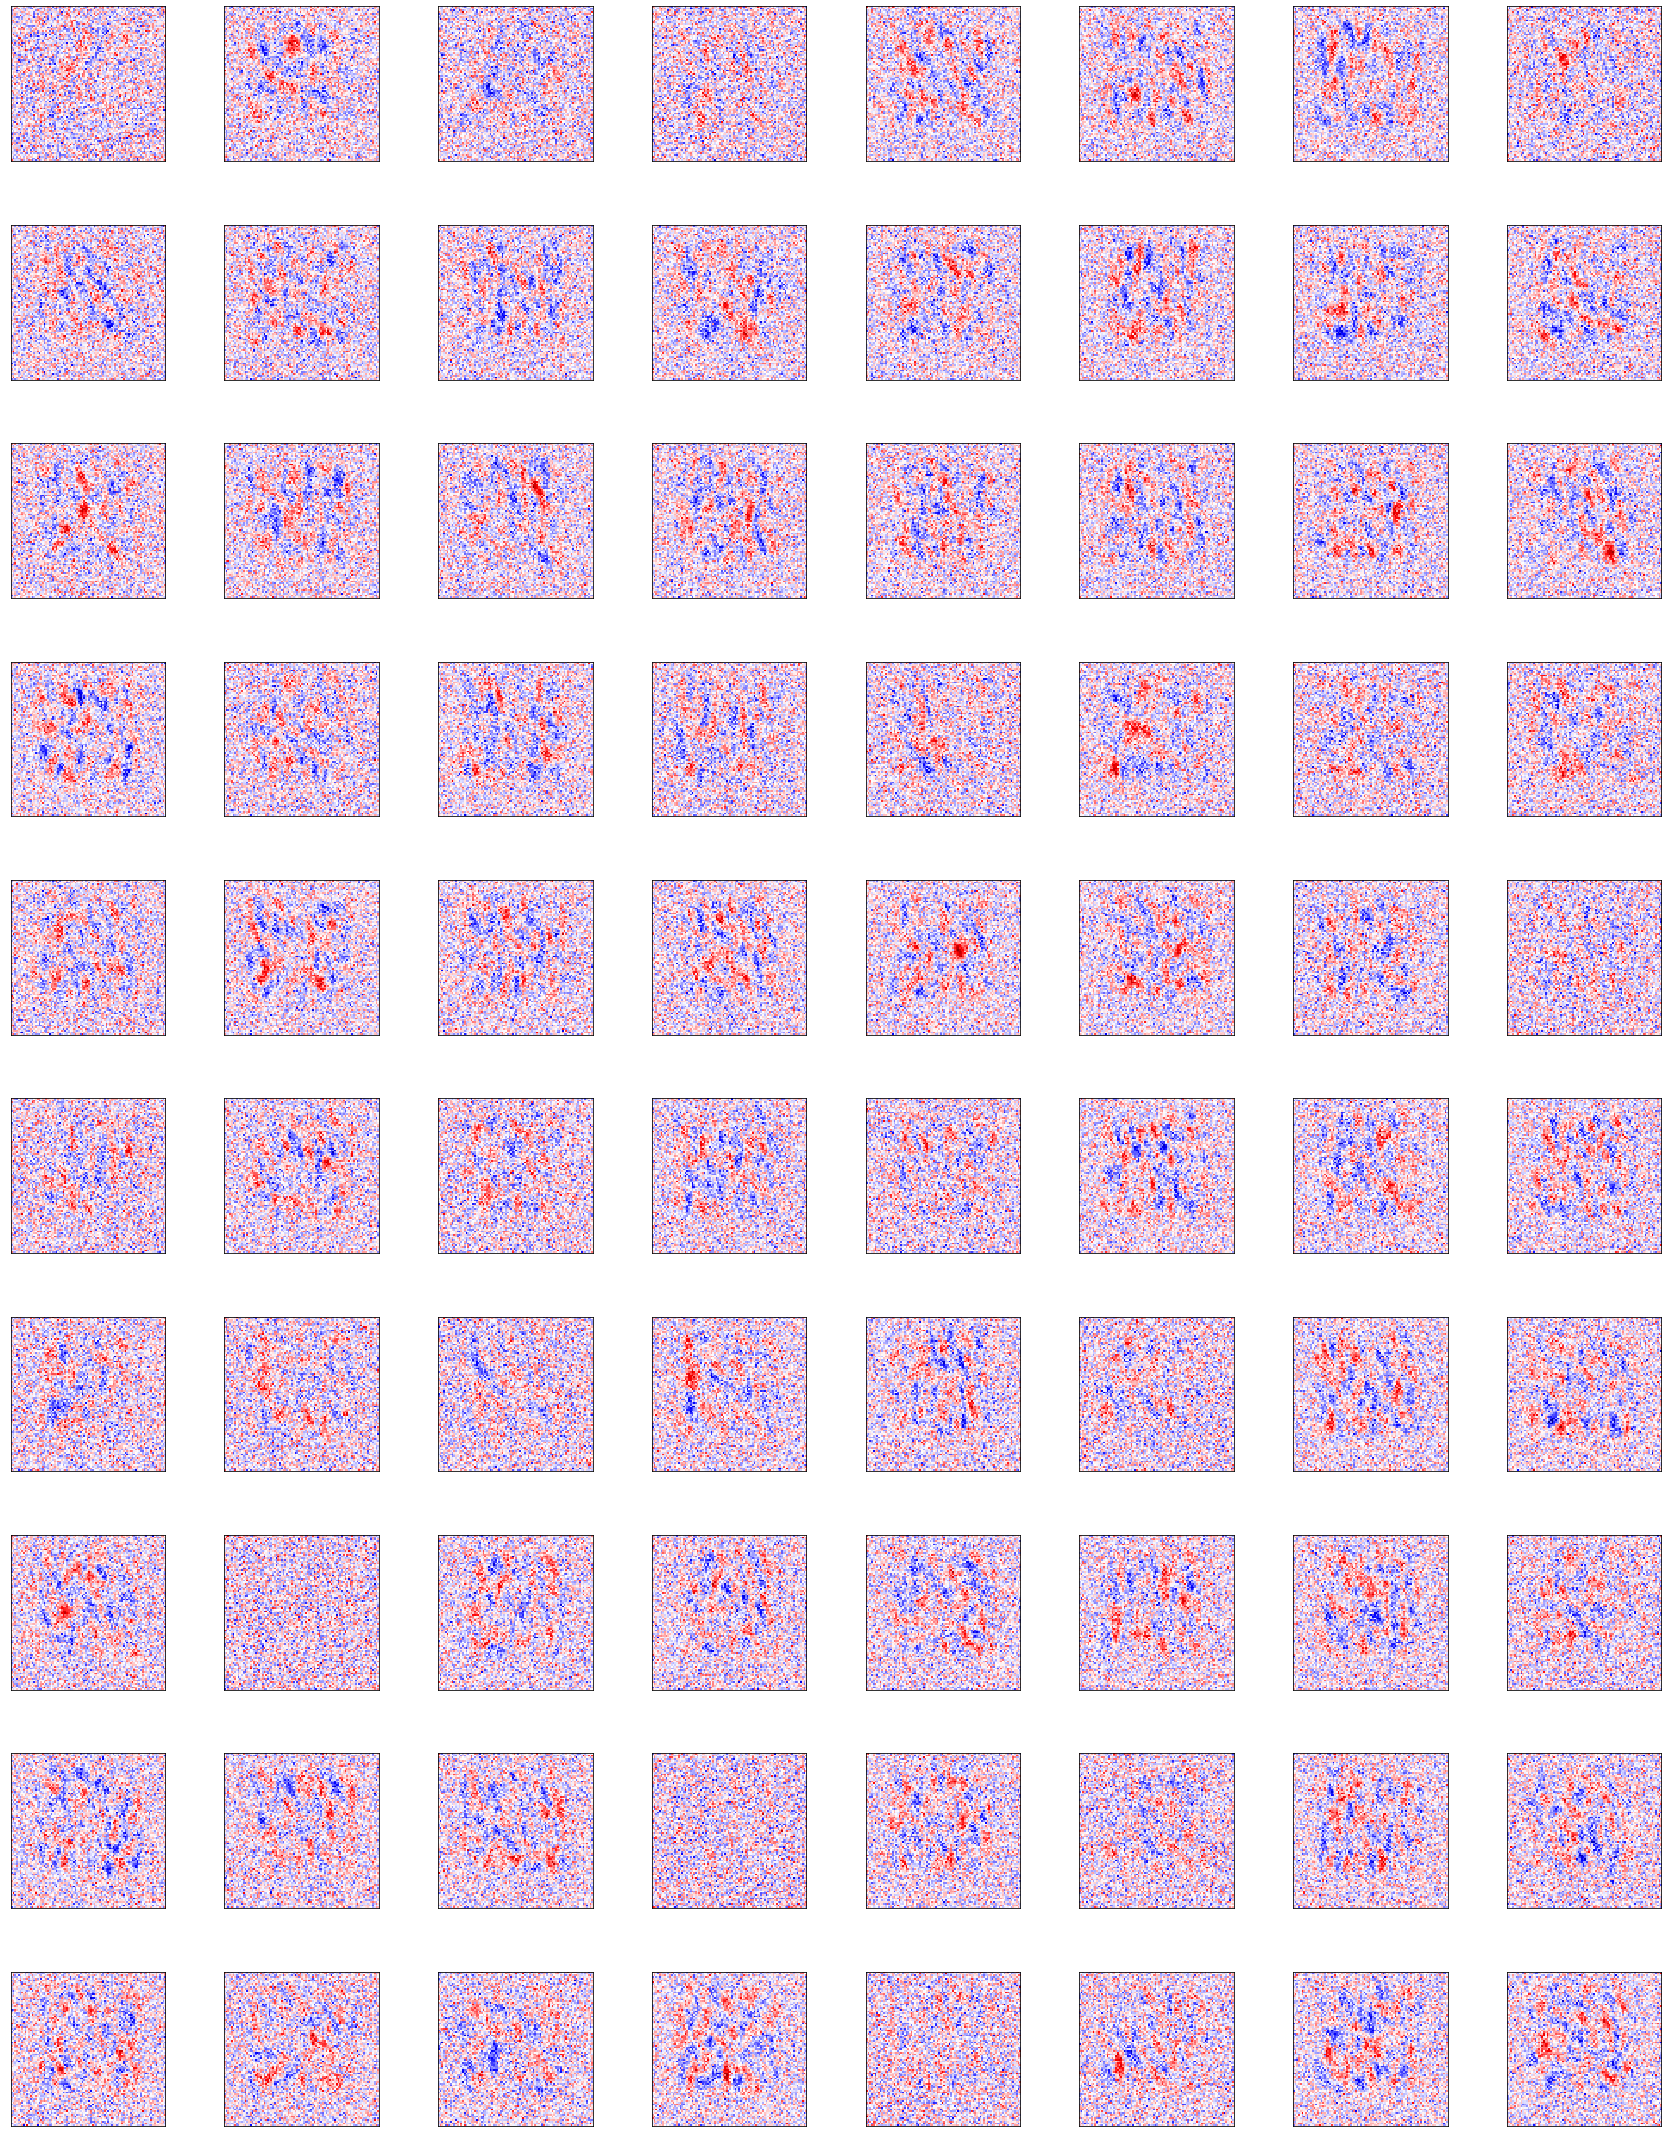

In [ ]:
import pyret
Spat_kernels = visualize_sta(Rfs)

In [ ]:
len(Spat_kernels)

80

In [ ]:
Spat_kernels[0]

array([[-0.00664485,  0.00093302,  0.00657926, ...,  0.02079236,
         0.01204739, -0.01408349],
       [-0.00419119,  0.00375894,  0.02069316, ...,  0.00961772,
        -0.00798472,  0.00538802],
       [-0.01580196,  0.01662615,  0.00382833, ...,  0.01392228,
         0.02214711,  0.00944568],
       ...,
       [ 0.0025346 , -0.01367094, -0.00080134, ...,  0.02061641,
         0.00618504, -0.00819066],
       [ 0.00740251, -0.01913714, -0.00657727, ..., -0.00496952,
         0.00547934,  0.00317228],
       [ 0.02274727,  0.00533888, -0.00518578, ..., -0.00128779,
         0.00968439,  0.02348208]], dtype=float32)

In [ ]:
fir_rate_pre.shape

(780, 80)

In [ ]:
firi_ra_pre.shape

(780, 80)

In [ ]:
firi_ra_pre[0,1]

0.30414364

In [ ]:
reconstr_image = Spat_kernels[0]*firi_ra_pre[0,0]

In [ ]:
reconstr_image.shape

(90, 90)

In [ ]:
for i in range(1,80):
  temp = Spat_kernels[i]*firi_ra_pre[0,i]
  reconstr_image += temp

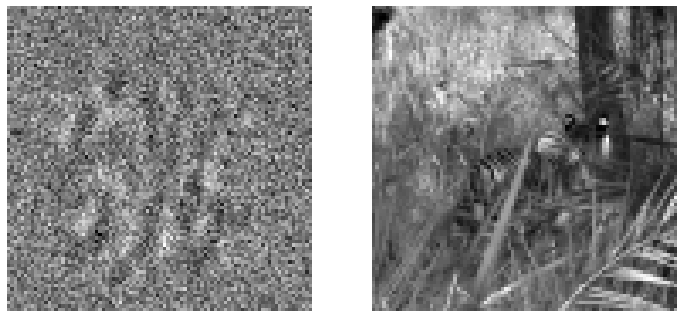

In [ ]:
f, axarr = plt.subplots(1,2, sharey=True, figsize=(12,6))
axarr[0].imshow(reconstr_image, cmap='gray', origin='lower');
axarr[0].axis('off');
axarr[1].imshow(frames[:,:,0], cmap='gray', origin='lower');
axarr[1].axis('off');

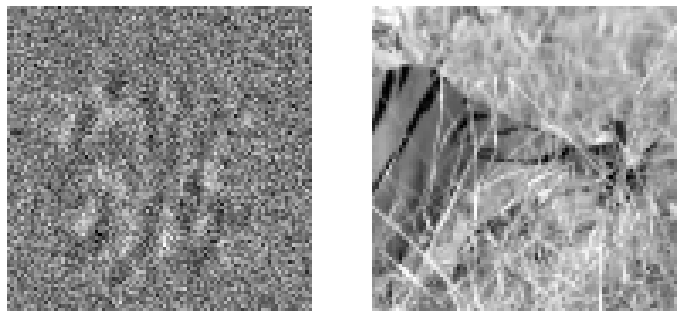

In [ ]:
f, axarr = plt.subplots(1,2, sharey=True, figsize=(12,6))
axarr[0].imshow(reconstr_image, cmap='gray', origin='lower');
axarr[0].axis('off');
axarr[1].imshow(frames[:,:,19], cmap='gray', origin='lower');
axarr[1].axis('off');

In [ ]:
reconstr_image = Spat_kernels[0]*firi_ra_pre[16,0]
for i in range(1,80):
  temp = Spat_kernels[i]*firi_ra_pre[16,i]
  reconstr_image += temp

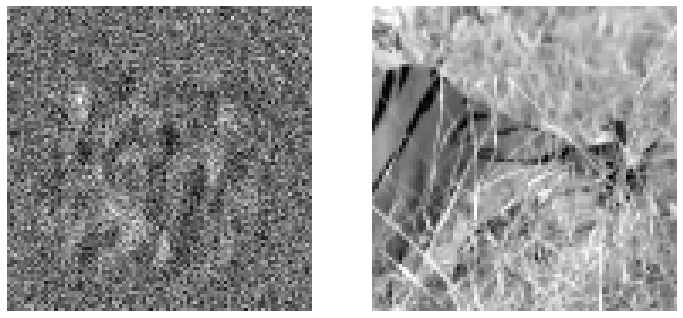

In [ ]:
f, axarr = plt.subplots(1,2, sharey=True, figsize=(12,6))
axarr[0].imshow(reconstr_image, cmap='gray', origin='lower');
axarr[0].axis('off');
axarr[1].imshow(frames[:,:,19], cmap='gray', origin='lower');
axarr[1].axis('off');